In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf

Loading the dataset

In [2]:
path = r'data/dataset.csv'

health_data = pd.read_csv(path,compression='gzip')

In [4]:
health_data.head(5)

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1440,45,1485,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,41,Carina's Tofu-Vegetable Kebabs,20,1440,1460,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc..."
2,42,Cabbage Soup,30,20,50,"c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,"c(""Mix everything together and bring to a boil..."
3,45,Buttermilk Pie With Gingersnap Crumb Crust,50,30,80,"c(""sugar"", ""margarine"", ""egg"", ""flour"", ""salt""...",228.0,7.1,1.7,24.5,281.8,37.5,0.5,24.7,4.2,"c(""Preheat oven to 350°F."", ""Make pie crust, u..."
4,46,A Jad - Cucumber Pickle,0,25,25,"c(""rice vinegar"", ""haeo"")",4.3,0.0,0.0,0.0,0.7,1.1,0.2,0.2,0.1,"c(""Slice the cucumber in four lengthwise, then..."


In [5]:
health_data.tail(5)

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
375698,541375,Amazing Ground Beef Stroganoff,20,30,50,"c(""hamburger"", ""onion"", ""celery"", ""water chest...",422.3,28.6,12.6,106.0,634.7,14.1,1.4,5.7,27.3,"c(""Saute meat in a medium skillet until it los..."
375699,541376,Spanish Coffee with Tia Maria,0,10,10,"c(""lemon wedge"", ""granulated sugar"", ""cognac"",...",84.3,2.1,1.2,6.8,15.7,16.6,0.4,15.4,0.6,"c(""Cut a small slit in the lemon wedge and sli..."
375700,541377,Slow-Cooker Classic Coffee Cake,180,20,200,"c(""all-purpose flour"", ""brown sugar"", ""butter""...",358.9,19.8,10.5,103.1,323.4,41.5,0.8,24.8,4.8,"c(""Line bottom and sides of 5-quart oval slow ..."
375701,541379,Meg's Fresh Ginger Gingerbread,35,60,95,"c(""fresh ginger"", ""unsalted butter"", ""dark bro...",316.6,12.5,7.6,54.4,278.2,48.5,0.8,22.8,3.9,"c(""Preheat oven to 350&deg;F Grease an 8x8 cak..."
375702,541382,Quick & Easy Asian Cucumber Salmon Rolls,0,15,15,"c(""wasabi paste"", ""dill"", ""English cucumber"", ...",16.1,0.6,0.1,2.9,100.5,0.3,0.0,0.1,2.4,"c(""In a small bowl, combine mayo and wasabi pa..."


In [6]:
health_data.columns

Index(['RecipeId', 'Name', 'CookTime', 'PrepTime', 'TotalTime',
       'RecipeIngredientParts', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeInstructions'],
      dtype='object')

In [7]:
health_data.value_counts().T

RecipeId  Name                                               CookTime  PrepTime  TotalTime  RecipeIngredientParts                                                                                                                                                                         Calories  FatContent  SaturatedFatContent  CholesterolContent  SodiumContent  CarbohydrateContent  FiberContent  SugarContent  ProteinContent  RecipeInstructions                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [8]:
health_data['Calories'].min()

0.0

In [9]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375703 entries, 0 to 375702
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RecipeId               375703 non-null  int64  
 1   Name                   375703 non-null  object 
 2   CookTime               375703 non-null  int64  
 3   PrepTime               375703 non-null  int64  
 4   TotalTime              375703 non-null  int64  
 5   RecipeIngredientParts  375703 non-null  object 
 6   Calories               375703 non-null  float64
 7   FatContent             375703 non-null  float64
 8   SaturatedFatContent    375703 non-null  float64
 9   CholesterolContent     375703 non-null  float64
 10  SodiumContent          375703 non-null  float64
 11  CarbohydrateContent    375703 non-null  float64
 12  FiberContent           375703 non-null  float64
 13  SugarContent           375703 non-null  float64
 14  ProteinContent         375703 non-nu

In [10]:
health_data.isna().T

,0,1,2,3,4,5,6,7,8,9,...,375693,375694,375695,375696,375697,375698,375699,375700,375701,375702
RecipeId,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Name,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CookTime,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PrepTime,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
TotalTime,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
RecipeIngredientParts,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Calories,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
FatContent,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
SaturatedFatContent,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CholesterolContent,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
health_data['Calories'].T

0         170.9
1         536.1
2         103.6
3         228.0
4           4.3
          ...  
375698    422.3
375699     84.3
375700    358.9
375701    316.6
375702     16.1
Name: Calories, Length: 375703, dtype: float64

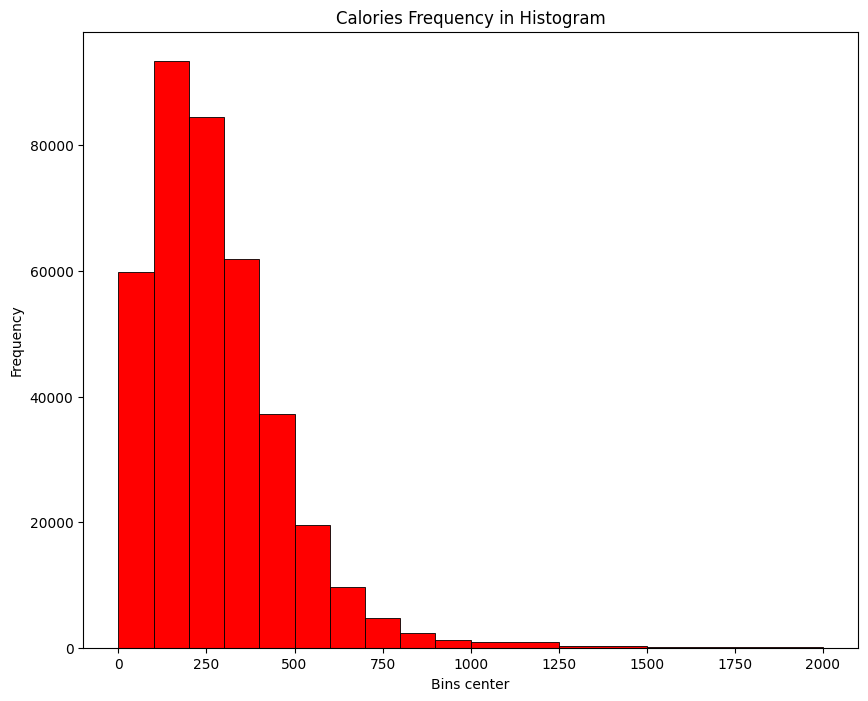

In [12]:
# Visualizing the dataset
fx,ax = plt.subplots(figsize=(10,8))
plt.title('Calories Frequency in Histogram')
plt.ylabel('Frequency')
plt.xlabel('Bins center')
ax.hist(
    health_data['Calories'],
    bins=[0,100,200,300,400,500,600,700,800,900,1000,1250,1500,2000],
    linewidth=0.6,
    color='red',
    edgecolor='black'
    )
plt.show()

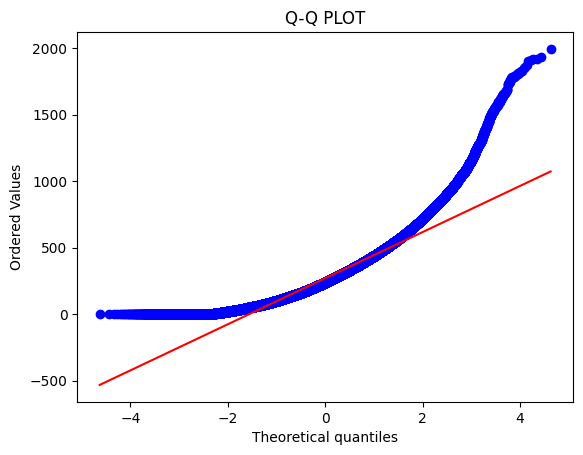

In [13]:
import scipy.stats as stats

sample_data = health_data['Calories']

stats.probplot(sample_data,dist='norm',plot=plt)
plt.title('Q-Q PLOT')
plt.show()


In [29]:
# Prepare the data

max_Calories=2000
max_daily_fat=100
max_daily_Saturatedfat=13
max_daily_Cholesterol=300
max_daily_Sodium=2300
max_daily_Carbohydrate=325
max_daily_Fiber=40
max_daily_Sugar=40
max_daily_Protein=200

max_list = [
	max_Calories,max_daily_fat,max_daily_Saturatedfat,max_daily_Cholesterol,
	max_daily_Sodium,max_daily_Carbohydrate,max_daily_Fiber,max_daily_Sugar,max_daily_Protein
]

extracted_data = health_data.copy()

for cols,maximum in zip(extracted_data.columns[6:15],max_list):
	extracted_data = extracted_data[extracted_data[cols] < maximum]

In [15]:
extracted_data = health_data.copy()
extracted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375703 entries, 0 to 375702
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RecipeId               375703 non-null  int64  
 1   Name                   375703 non-null  object 
 2   CookTime               375703 non-null  int64  
 3   PrepTime               375703 non-null  int64  
 4   TotalTime              375703 non-null  int64  
 5   RecipeIngredientParts  375703 non-null  object 
 6   Calories               375703 non-null  float64
 7   FatContent             375703 non-null  float64
 8   SaturatedFatContent    375703 non-null  float64
 9   CholesterolContent     375703 non-null  float64
 10  SodiumContent          375703 non-null  float64
 11  CarbohydrateContent    375703 non-null  float64
 12  FiberContent           375703 non-null  float64
 13  SugarContent           375703 non-null  float64
 14  ProteinContent         375703 non-nu

In [16]:
extracted_data.iloc[:,6:15].corr()

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
Calories,1.000000,0.767356,0.603317,0.478934,0.501082,0.711640,0.458711,0.180895,0.689447
FatContent,0.767356,1.000000,0.767357,0.440515,0.381944,0.223549,0.192142,0.042603,0.468088
SaturatedFatContent,0.603317,0.767357,1.000000,0.512186,0.319671,0.176623,0.044003,0.090721,0.388618
CholesterolContent,0.478934,0.440515,0.512186,1.000000,0.335843,0.066104,-0.047346,-0.036112,0.675302
SodiumContent,0.501082,0.381944,0.319671,0.335843,1.000000,0.294636,0.260479,-0.055518,0.500457
CarbohydrateContent,0.711640,0.223549,0.176623,0.066104,0.294636,1.000000,0.580535,0.390120,0.255447
FiberContent,0.458711,0.192142,0.044003,-0.047346,0.260479,0.580535,1.000000,0.068758,0.273488
SugarContent,0.180895,0.042603,0.090721,-0.036112,-0.055518,0.390120,0.068758,1.000000,-0.120441
ProteinContent,0.689447,0.468088,0.388618,0.675302,0.500457,0.255447,0.273488,-0.120441,1.000000


In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
prep_data=scaler.fit_transform(extracted_data.iloc[:,6:15].to_numpy())

In [18]:
prep_data

array([[-0.55093359, -0.91281917, -0.77924852, ...,  0.15672078,
         2.35502102, -0.68338127],
       [ 1.47428542,  1.13139595, -0.0647135 , ...,  3.91055068,
         2.56324444,  1.25158691],
       [-0.92414618, -1.11248669, -1.12222533, ...,  0.4855234 ,
         0.98513013, -0.60183088],
       ...,
       [ 0.49162165,  0.73206091,  1.85024037, ..., -0.61048534,
         1.76322815, -0.56476253],
       [ 0.25704672,  0.03797856,  1.02137974, ..., -0.61048534,
         1.54404561, -0.63148557],
       [-1.40937801, -1.09347074, -1.12222533, ..., -0.82968708,
        -0.94367625, -0.74269064]])

In [19]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(metric='cosine',algorithm='brute')
neigh.fit(prep_data)

NearestNeighbors(algorithm='brute', metric='cosine')

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(neigh.kneighbors,kw_args={'return_distance':False})
pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])

In [21]:
params={'n_neighbors':10,'return_distance':False}
pipeline.get_params()
pipeline.set_params(NN__kw_args=params)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('NN',
                 FunctionTransformer(func=<bound method KNeighborsMixin.kneighbors of NearestNeighbors(algorithm='brute', metric='cosine')>,
                                     kw_args={'n_neighbors': 10,
                                              'return_distance': False}))])

In [23]:
pipeline.transform(extracted_data.iloc[0:1,6:15].to_numpy())[0]

array([     0, 333440, 349044, 109248,  19679, 156831, 144322, 301119,
       262699, 332342], dtype=int64)

Testing the model

In [24]:
extracted_data.iloc[pipeline.transform(extracted_data.iloc[0:1,6:15].to_numpy())[0]]

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1440,45,1485,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
333440,480841,Mango Salsa,5,10,15,"c(""fresh mango"", ""tomatoes"", ""sweet onion"", ""f...",152.5,0.8,0.2,0.0,6.6,37.9,3.8,34.0,2.2,"c(""In a medium-sized bowl, whisk together vine..."
349044,503065,Glazed Pineapple With Cinnamon Creme Fraiche,10,10,20,"c(""lime"", ""honey"", ""ground cinnamon"", ""ground ...",172.5,2.2,1.2,5.0,19.8,41.5,3.8,32.4,1.4,"c(""Mix the lime juice and half the lime zest w..."
109248,165636,Lemon Float Punch,7200,5,7205,"c(""lemons"", ""sugar"", ""water"", ""ginger ale"", ""l...",158.4,1.7,0.9,0.4,38.6,40.1,4.0,31.1,1.9,"c(""Combine lemon juice and sugar; stir to diss..."
19679,32172,L & B's Concoction,5,5,10,"c(""strawberry"", ""strawberry"", ""milk"", ""blueber...",167.3,2.0,1.0,5.7,26.2,38.4,3.0,29.9,3.1,"c(""Blend the frozen strawberries, ice cubes, y..."
156831,233508,Blueberry Mango Smoothie,0,5,5,"c(""vanilla-flavored soymilk"", ""frozen blueberr...",147.5,0.4,0.1,0.0,2.9,39.5,4.2,34.9,0.9,"""Place all ingredients in a blender. Blend un..."
144322,215824,Blueberry Orange Smoothie,0,5,5,"c(""blueberries"", ""fresh blueberries"")",179.4,2.6,1.3,0.7,34.3,38.1,3.0,30.4,3.1,"c(""Combine first 5 ingredients in blender."", ""..."
301119,434977,Preserved Apple Pie Filling,30,60,90,"c(""apples"", ""bottled lemon juice"", ""sugar"", ""g...",161.3,0.3,0.1,0.0,3.6,42.2,3.8,36.4,0.4,"c(""Set a large pot of water to boil."", ""Pour 1..."
262699,381181,Tropical Twister Smoothies,0,5,5,"c(""fresh mango"", ""papaya"", ""fresh pineapple ch...",190.8,2.6,1.4,8.0,32.4,41.3,3.6,29.6,4.0,"c(""Combine all ingredients in a blender and pr..."
332342,479288,Summer Fruit Bowl,0,90,90,"c(""blueberries"", ""granulated sugar"", ""kirsch"",...",155.4,0.2,0.0,0.0,10.2,40.6,3.8,36.2,1.7,"c(""Place fruit in a large bowl."", ""Add sugar a..."


In [25]:
extracted_data[extracted_data['RecipeIngredientParts'].str.contains("egg",regex=False)]

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
1,41,Carina's Tofu-Vegetable Kebabs,20,1440,1460,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc..."
3,45,Buttermilk Pie With Gingersnap Crumb Crust,50,30,80,"c(""sugar"", ""margarine"", ""egg"", ""flour"", ""salt""...",228.0,7.1,1.7,24.5,281.8,37.5,0.5,24.7,4.2,"c(""Preheat oven to 350°F."", ""Make pie crust, u..."
6,50,Biscotti Di Prato,50,20,70,"c(""flour"", ""sugar"", ""baking powder"", ""salt"", ""...",89.4,2.6,0.3,16.6,23.5,14.5,0.8,7.3,2.3,"c(""EGG WASH 1 Egg, large 1 tsp Water In the bo..."
10,56,Buttermilk Pie,60,20,80,"c(""butter"", ""margarine"", ""sugar"", ""flour"", ""eg...",395.9,19.1,9.8,101.5,269.8,52.2,0.7,39.9,5.0,"c(""Preheat oven to 400°F."", ""Beat the butter a..."
14,60,Blueberry Dessert,0,35,35,"c(""Bisquick baking mix"", ""sugar"", ""butter"", ""m...",381.1,17.3,8.8,62.1,437.6,54.5,1.6,36.9,3.9,"c(""Heat oven to 400 degrees."", ""Mix 2 cups bak..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375684,541351,Spinach & Mushroom Quiche with Boursin,60,20,80,"c(""butter"", ""onion"", ""sweet pepper"", ""carrots""...",197.6,11.0,4.0,82.2,283.3,19.0,2.0,3.0,6.1,"c(""Bake pie crust(s) according to package inst..."
375690,541357,Chocolate Rum Snowballs,8,15,23,"c(""rolled oats"", ""sweetened flaked coconut"", ""...",127.8,6.2,4.1,14.9,57.9,15.8,1.3,9.4,1.8,"c(""In a large mixing bowl, combine oats, 1 cup..."
375694,541367,Thick Peanut Pancakes,10,45,55,"c(""plain flour"", ""baking powder"", ""baking soda...",712.9,25.4,8.6,121.4,503.9,100.3,6.0,20.2,23.2,"c(""Add rock sugar to milk."", ""Steam milk at lo..."
375700,541377,Slow-Cooker Classic Coffee Cake,180,20,200,"c(""all-purpose flour"", ""brown sugar"", ""butter""...",358.9,19.8,10.5,103.1,323.4,41.5,0.8,24.8,4.8,"c(""Line bottom and sides of 5-quart oval slow ..."


Creating an end to end function

In [26]:
def scaling(dataframe):
    scaler=StandardScaler()
    prep_data=scaler.fit_transform(dataframe.iloc[:,6:15].to_numpy())
    return prep_data,scaler

def nn_predictor(prep_data):
    neigh = NearestNeighbors(metric='cosine',algorithm='brute')
    neigh.fit(prep_data)
    return neigh

def build_pipeline(neigh,scaler,params):
    transformer = FunctionTransformer(neigh.kneighbors,kw_args=params)
    pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])
    return pipeline

def extract_data(dataframe,ingredient_filter,max_nutritional_values):
    extracted_data=dataframe.copy()
    for column,maximum in zip(extracted_data.columns[6:15],max_nutritional_values):
        extracted_data=extracted_data[extracted_data[column]<maximum]
    if ingredient_filter!=None:
        for ingredient in ingredient_filter:
            extracted_data=extracted_data[extracted_data['RecipeIngredientParts'].str.contains(ingredient,regex=False)] 
    return extracted_data

def apply_pipeline(pipeline,_input,extracted_data):
    return extracted_data.iloc[pipeline.transform(_input)[0]]

def recommand(dataframe,_input,max_nutritional_values,ingredient_filter=None,params={'return_distance':False}):
    extracted_data=extract_data(dataframe,ingredient_filter,max_nutritional_values)
    prep_data,scaler=scaling(extracted_data)
    neigh=nn_predictor(prep_data)
    pipeline=build_pipeline(neigh,scaler,params)
    return apply_pipeline(pipeline,_input,extracted_data)

In [30]:
test_input=extracted_data.iloc[0:1,6:15].to_numpy()
recommand(health_data,test_input,max_list)

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1440,45,1485,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
333440,480841,Mango Salsa,5,10,15,"c(""fresh mango"", ""tomatoes"", ""sweet onion"", ""f...",152.5,0.8,0.2,0.0,6.6,37.9,3.8,34.0,2.2,"c(""In a medium-sized bowl, whisk together vine..."
349044,503065,Glazed Pineapple With Cinnamon Creme Fraiche,10,10,20,"c(""lime"", ""honey"", ""ground cinnamon"", ""ground ...",172.5,2.2,1.2,5.0,19.8,41.5,3.8,32.4,1.4,"c(""Mix the lime juice and half the lime zest w..."
109248,165636,Lemon Float Punch,7200,5,7205,"c(""lemons"", ""sugar"", ""water"", ""ginger ale"", ""l...",158.4,1.7,0.9,0.4,38.6,40.1,4.0,31.1,1.9,"c(""Combine lemon juice and sugar; stir to diss..."
19679,32172,L & B's Concoction,5,5,10,"c(""strawberry"", ""strawberry"", ""milk"", ""blueber...",167.3,2.0,1.0,5.7,26.2,38.4,3.0,29.9,3.1,"c(""Blend the frozen strawberries, ice cubes, y..."
